# Redes Temporais de Co-Autoria (U1P1)
---
Disciplina: Algoritmos e Estruturas de Dados II
</br>Discente: Felipe Gabriel B. da Silva

---
</br>
O presente projeto tem como objetivo analisar a rede de co-autoria dos trabalhos do Programa de Pós-graduação em Engenharia Elétrica e de Computação (PPgEEC) da UFRN, bem como reforçar os conceitos sobre grafos aprendidos em sala de aula, utilizando a biblioteca NetworkX.
</br>
Outras bibliotecas importantes que também são utilizadas no projeto:

*   Matplotlib
*   Google.colab
*   Joypy
*   Seaborn
*   Pandas



# Requisito 1
## Análise do comportamento na série temporal anual.
Métricas analisadas:
*   Densidade da rede
*   Número de vértices (nós)
*   Número de arestas (conexões)
*   Número médio de vizinhos
*   Distribuição do número de vizinhos

Foram criadas 5 listas para guardar os valores das métricas, a fim de facilitar o uso dos valores no futuro. Para isso, foram utilizadas as seguintes funções da biblioteca NetworkX:
*   G = nx.read_gexf()
*   nx.density(G)
*   G.number_of_nodes()
*   G.number_of_edges()
*   G.degree()







In [1]:
import networkx as nx
from google.colab import drive


# Criação de listas para guardar os valores de cada métrica, ordenadas por ano.
# Servirá para a criação do gráfico comparativo.
lista_anos = []
lista_densidade = []
lista_nos = []
lista_arestas = []
lista_media_graus = []

# Laço criado para evitar repetição de código, percorrendo todos os arquivos de extensão .GEXF da pasta 'anos'.
# O laço percorre a faixa do ano 2010 ao ano 2025.
for var_ano in range(2010, 2026):
  arquivo = '/content/drive/MyDrive/2025.1/AED2/Archive/basedados/anos/'+str(var_ano)+'_authors_network.gexf'
  # Cria um grafo G não direcionado com os dados do arquivo acima
  G = nx.read_gexf(arquivo)
  graus = [grau for _, grau in G.degree()] # Cria uma lista com o grau dos nós do grafo
  media_graus = sum(graus) / len(graus) # Calcula o valor médio dos graus

  # Imprime as métricas da rede
  print('\nRede de autores de '+str(var_ano))
  print(f'Densidade: {nx.density(G):.3f}, Nº de nós: {G.number_of_nodes()}, Nº de arestas: {G.number_of_edges()}, Grau médio: {media_graus:.3f}')

  # Adiciona a métrica na lista correspondente
  lista_anos.append(var_ano)
  lista_densidade.append(nx.density(G))
  lista_nos.append(G.number_of_nodes())
  lista_arestas.append(G.number_of_edges())
  lista_media_graus.append(media_graus)



Rede de autores de 2010
Densidade: 0.032, Nº de nós: 276, Nº de arestas: 1227, Grau médio: 8.891

Rede de autores de 2011
Densidade: 0.031, Nº de nós: 306, Nº de arestas: 1451, Grau médio: 9.484

Rede de autores de 2012
Densidade: 0.034, Nº de nós: 280, Nº de arestas: 1324, Grau médio: 9.457

Rede de autores de 2013
Densidade: 0.029, Nº de nós: 366, Nº de arestas: 1928, Grau médio: 10.536

Rede de autores de 2014
Densidade: 0.026, Nº de nós: 437, Nº de arestas: 2439, Grau médio: 11.162

Rede de autores de 2015
Densidade: 0.027, Nº de nós: 415, Nº de arestas: 2285, Grau médio: 11.012

Rede de autores de 2016
Densidade: 0.032, Nº de nós: 375, Nº de arestas: 2214, Grau médio: 11.808

Rede de autores de 2017
Densidade: 0.028, Nº de nós: 411, Nº de arestas: 2366, Grau médio: 11.513

Rede de autores de 2018
Densidade: 0.026, Nº de nós: 460, Nº de arestas: 2773, Grau médio: 12.057

Rede de autores de 2019
Densidade: 0.021, Nº de nós: 605, Nº de arestas: 3887, Grau médio: 12.850

Rede de auto

# Gráfico comparativo
A partir dos dados acima, foi possível criar um gráfico mostrando a evolução das métricas das redes de co-autoria do PPgEEC.
*   No eixo X estão setados os anos das redes (2010 até 2025).
*   No eixo Y estão os valores de cada uma das métricas em escala logarítimica.

Foi utilizada a escala logarítimica no eixo Y em razão da diferença de escala das métricas, para fins de comparação.
</br>Os gráficos abaixo foram criados utilizando funções da biblioteca Matplotlib.
</br>Foram criadas linhas verticais representando marcos importantes das avaliações do PPgEEC nos anos de 2012, 2016, 2020 e 2024.

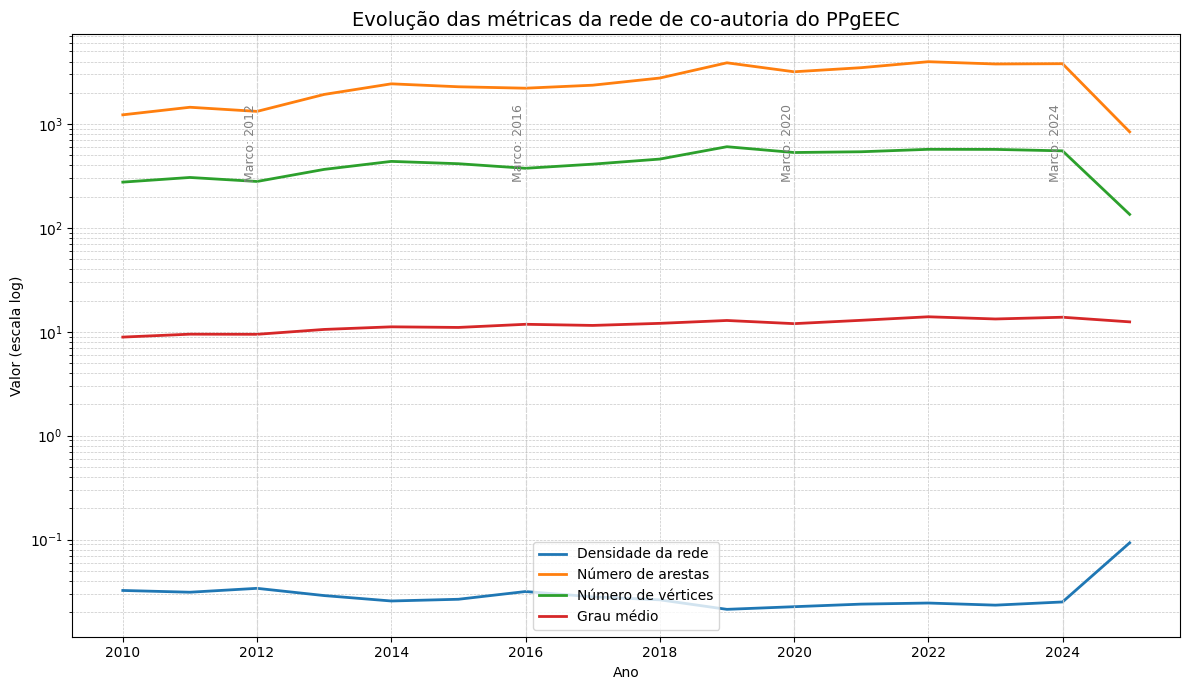

In [5]:
import matplotlib.pyplot as plt

# Criação da figura
plt.figure(figsize=(12, 7))

# Plot das métricas
plt.plot(lista_anos, lista_densidade, label='Densidade da rede', linewidth=2)
plt.plot(lista_anos, lista_arestas, label='Número de arestas', linewidth=2)
plt.plot(lista_anos, lista_nos, label='Número de vértices', linewidth=2)
plt.plot(lista_anos, lista_media_graus, label='Grau médio', linewidth=2)

# Eixo y em escala logarítmica
plt.yscale('log')

# Cria linhas verticais de marcos importantes
for ano in [2012, 2016, 2020, 2024]:
    plt.axvline(x=ano, color='LightGrey', linestyle='--', linewidth=0.9, alpha=0.8)
    plt.text(ano - 0.2, plt.ylim()[1] * 0.09, f'Marco: {ano}', rotation=90, color='gray', va='center', fontsize=9)

# Títulos e legendas
plt.title('Evolução das métricas da rede de co-autoria do PPgEEC', fontsize=14)
plt.xlabel('Ano', fontsize=10)
plt.ylabel('Valor (escala log)', fontsize=10)

# Grade e legenda
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.tight_layout()

# Exibição
plt.show()


# Gráfico comparativo
Um segundo modelo de gráfico foi criado para melhor visualização das métricas, a fim de serem analisadas de forma individual.
</br>Da mesma maneira, foram criados marcos importantes referentes às avaliações do PPgEEC nos anos de 2012, 2016, 2020 e 2024.


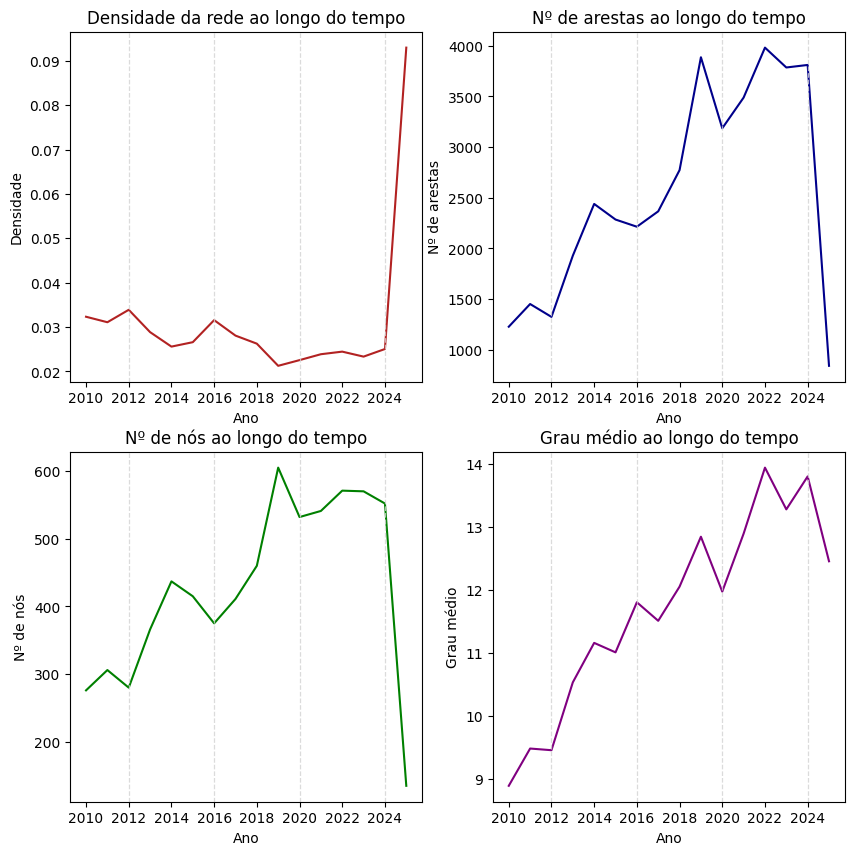

In [6]:
from matplotlib.ticker import MaxNLocator
# Função para criar cada um dos gráficos, evitando que o código fique repetitivo e muito grande
def plot_grafico(indice, valor_x, valor_y, nome_grafico, nome_eixo_x, nome_eixo_y, color_):
    plt.subplot(2,2,indice) # Cria um subplot com 2 linhas e 2 colunas e o índice é passado no argumento da função
    plt.plot(valor_x, valor_y,color=color_) # Plota a curva com os dados passados
    # Coloca um nome nos eixos e o título do gráfico
    plt.xlabel(nome_eixo_x)
    plt.ylabel(nome_eixo_y)
    plt.title(nome_grafico)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # Para evitar que o matplotlib redimensione os valores do eixo X
    # Cria linhas verticais dos marcos importantes
    for ano in [2012, 2016, 2020, 2024]:
        plt.axvline(x=ano, color='LightGrey', linestyle='--', linewidth=0.9, alpha=0.8, label=f'Marco: {ano}')


plt.figure(figsize=(10,10)) # Cria uma figura para a plotagem geral
# Faz a chamada da função para as 4 curvas
plot_grafico(1, lista_anos, lista_densidade, 'Densidade da rede ao longo do tempo', 'Ano', 'Densidade','#b22222')
plot_grafico(2, lista_anos, lista_arestas, 'Nº de arestas ao longo do tempo', 'Ano', 'Nº de arestas','#00008b')
plot_grafico(3, lista_anos, lista_nos, 'Nº de nós ao longo do tempo', 'Ano', 'Nº de nós','#008000')
plot_grafico(4, lista_anos, lista_media_graus, 'Grau médio ao longo do tempo', 'Ano', 'Grau médio','#800080')
# Exibição
plt.show()

## Histograma - Função de densidade de probabilidade
A fim de ser analisada a distribuição do número de vizinhos nas redes, foi criado um histograma para visualizar como o grau dos nós evolui ao longo dos anos.
</br>
</br>Utilizando a biblioteca Joypy, foi criado um gráfico do tipo Ridge Plot, um estilo de gráfico em 'camadas', a fim de analisar o comportamento da curva de probabilidade dos graus de cada rede.


In [ ]:
pip install joypy # Para instalar a biblioteca Joypy

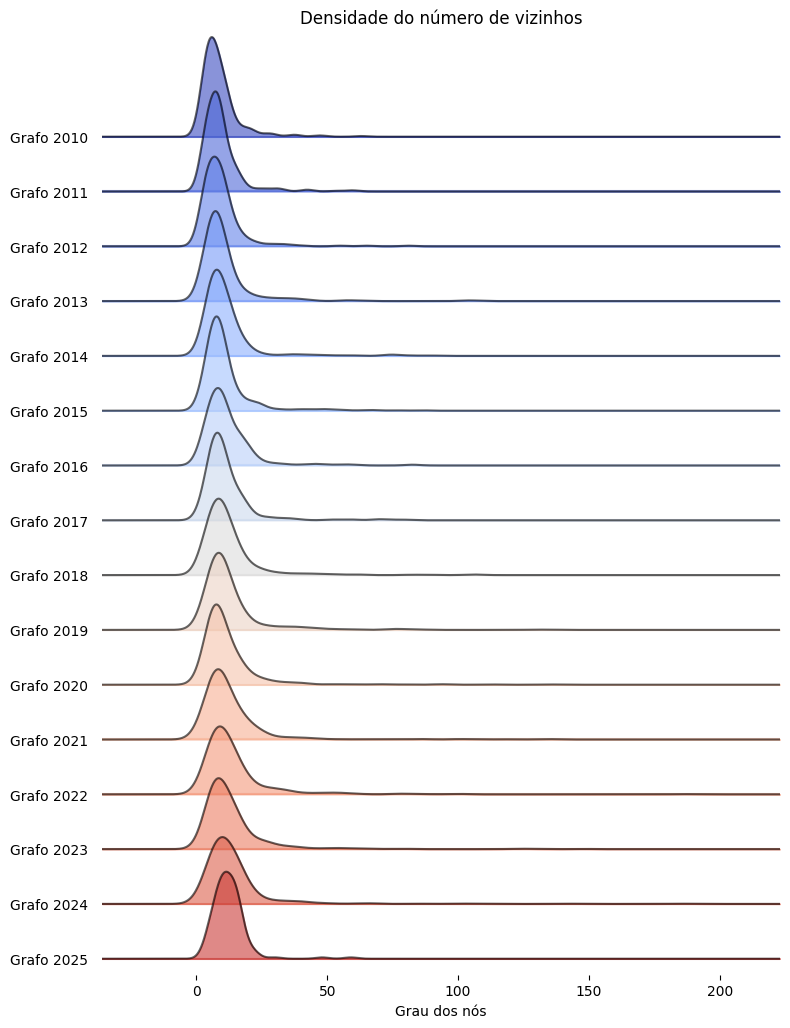

In [8]:
from joypy import joyplot
import seaborn as sns
import pandas as pd

# Lista para adicionar
dados = []
# Laço para percorrer cada rede
for var_ano in range(2010, 2026):
  arquivo = '/content/drive/MyDrive/2025.1/AED2/Archive/basedados/anos/'+str(var_ano)+'_authors_network.gexf'
  # Criação de um grafo G não direcionado
  G = nx.read_gexf(arquivo)
  # Lista para adicionar todos os graus dos nós
  graus = [grau for _, grau in G.degree()]
  # Laço para percorrer todos os graus da rede
  for grau in graus:
      # Adiciona um rótulo e o grau na lista 'dados'
      dados.append({
          'Grafo': f'Grafo {var_ano}',
          'Grau': grau
      })
# Ao final do primeiro laço, existirá uma lista com todos os graus, junto de cada rótulo, formando um dicionário
# Para o gráfico, cada rótulo com do mesmo tipo será agrupado

df = pd.DataFrame(dados) # Transforma o dicionário em uma DataFrame para ser interpretado no gráfico

# Gráfico com joypy
joyplot(
    data=df, # Seta o dataframe como o conjunto de dados para as curvas
    by="Grafo", # Agrupa os valores pelo rótulo
    column="Grau", # Passa os valores para a curva
    colormap=plt.cm.coolwarm, # Seta o conjunto de cores
    alpha=0.6,
    figsize=(8,10) # Tamaho do gráfico completo
)
# Título e label do gráfico
plt.title('Densidade do número de vizinhos')
plt.xlabel('Grau dos nós')
plt.show() # Para exibição

# Requisito 2
# Visualização dos Grafos
### Foi criado um grafo para cada período de avaliação do PPgEEC, a fim de serem visualizadas as conexões e características das redes.
#### Períodos de avaliação:


1.   2010 até 2012
2.   2013 até 2016
3.   2017 até 2020
4.   2021 até 2025

#### Características importantes dos grafos:
*   O tamanho do vértice é proporcional ao número de vizinhos (grau do vértice)
*   Os 5 vértices com mais vizinhos estão destacados com a cor vermelha e é mostrado o valor do 'id'
*   Cor da aresta dependerá da ligação entre membros permanentes:
**  Vermelha, caso a propriedade do vértice 'is_permanent' = True
**  Preta, caso a propriedade do vértice 'is_permanent' = False
*   A espessura da aresta será proporcional à quantidade de citações:
**  Ou seja, proporcional à propriedade da aresta 'citation_num'



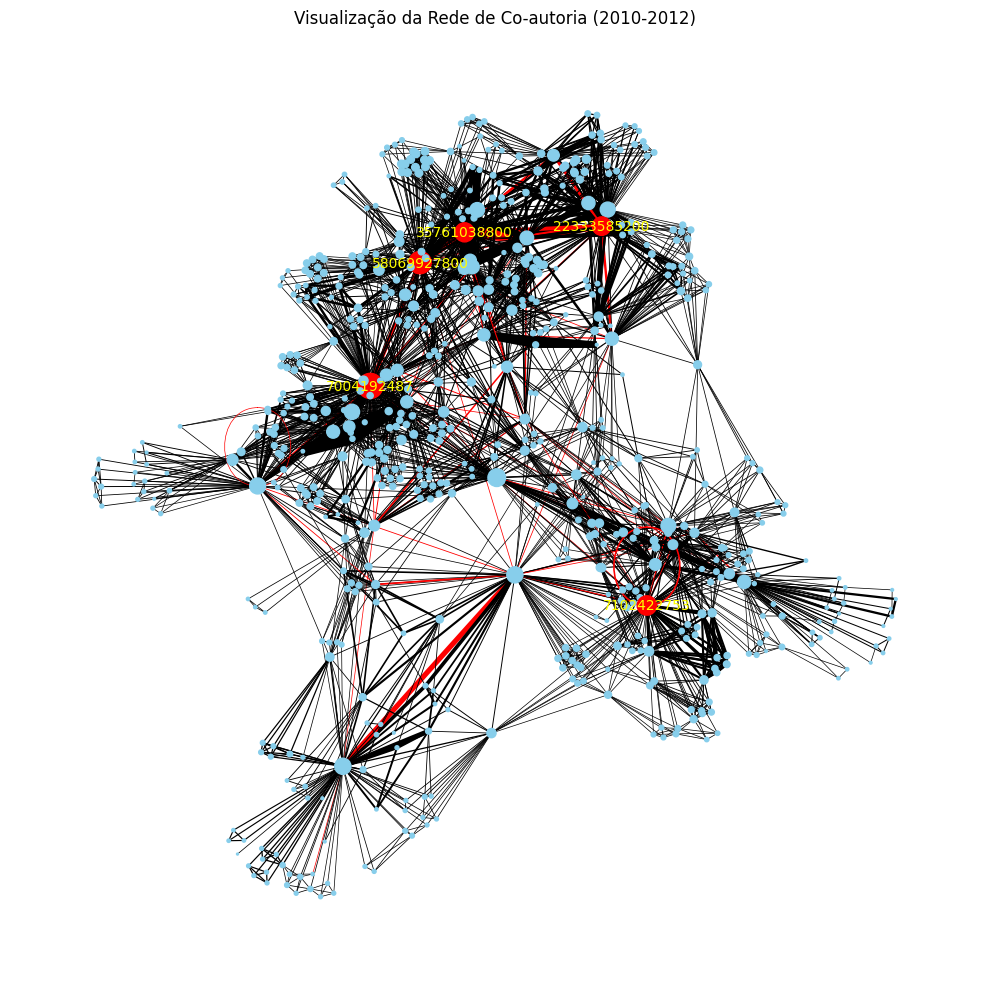

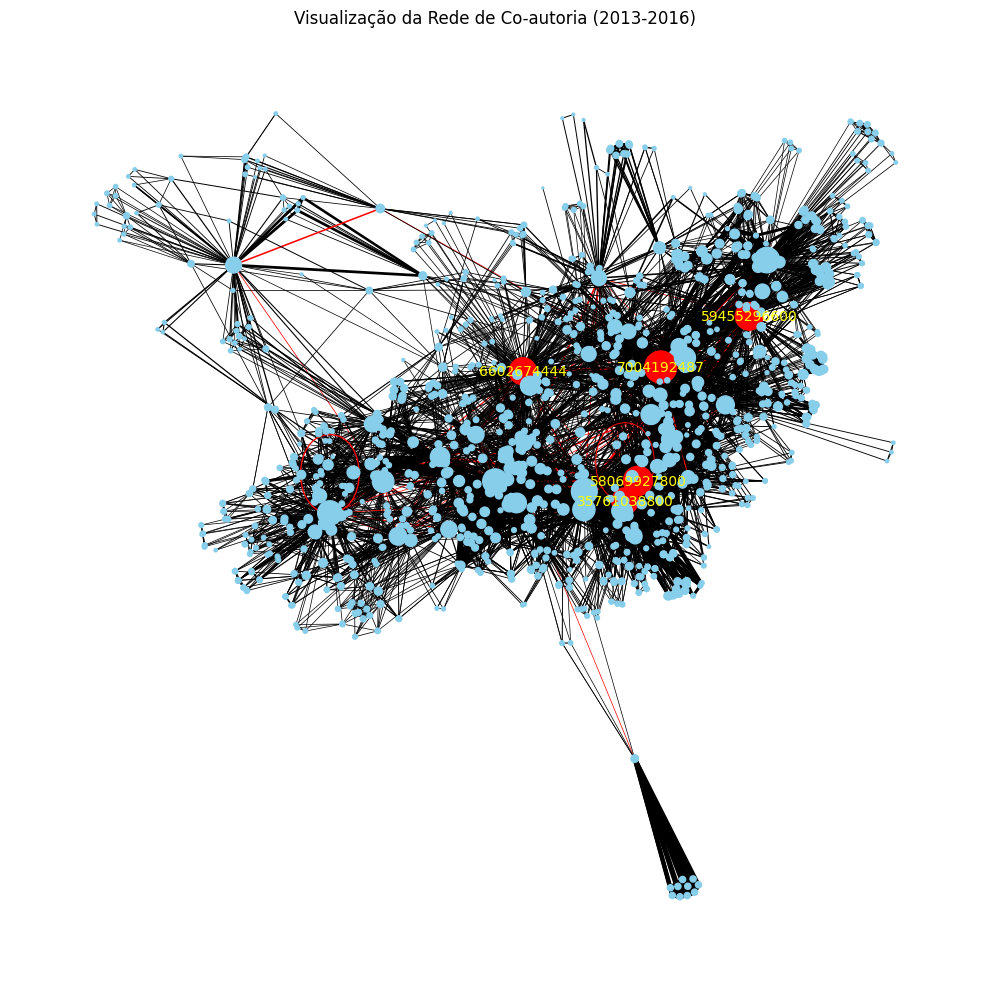

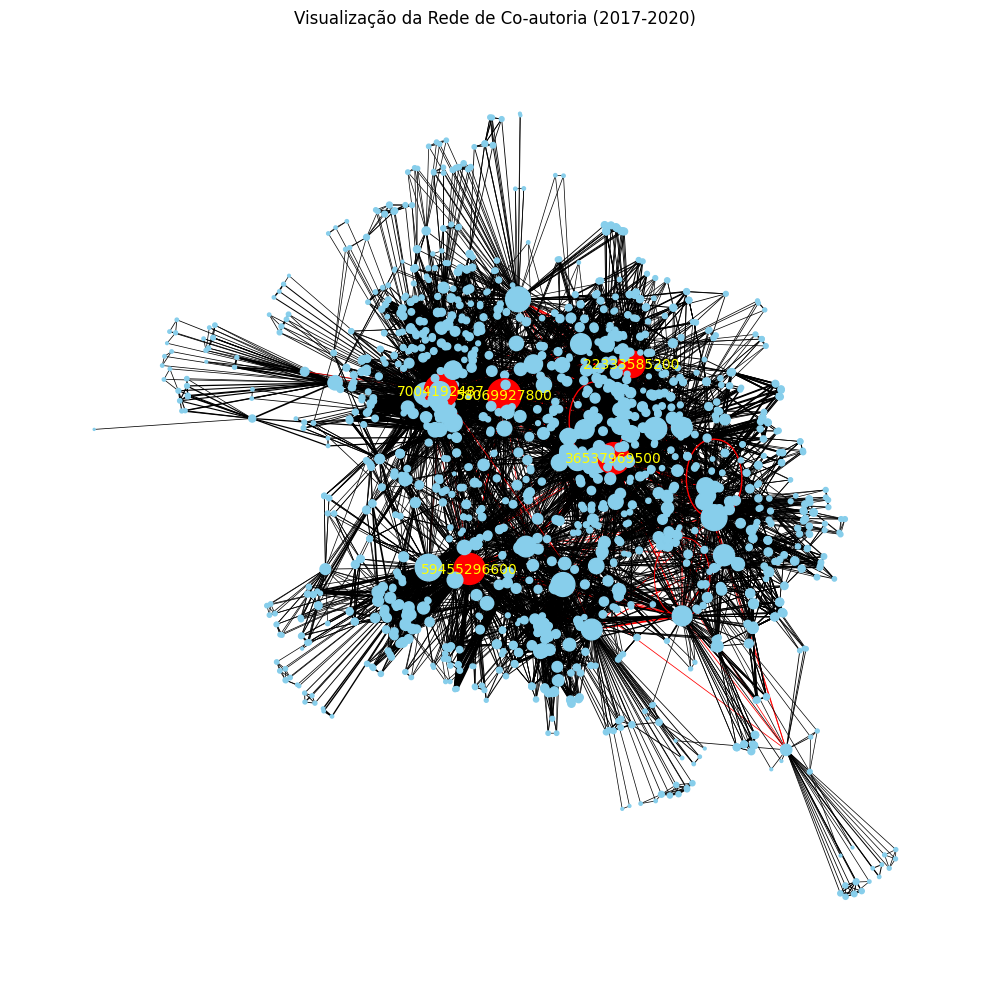

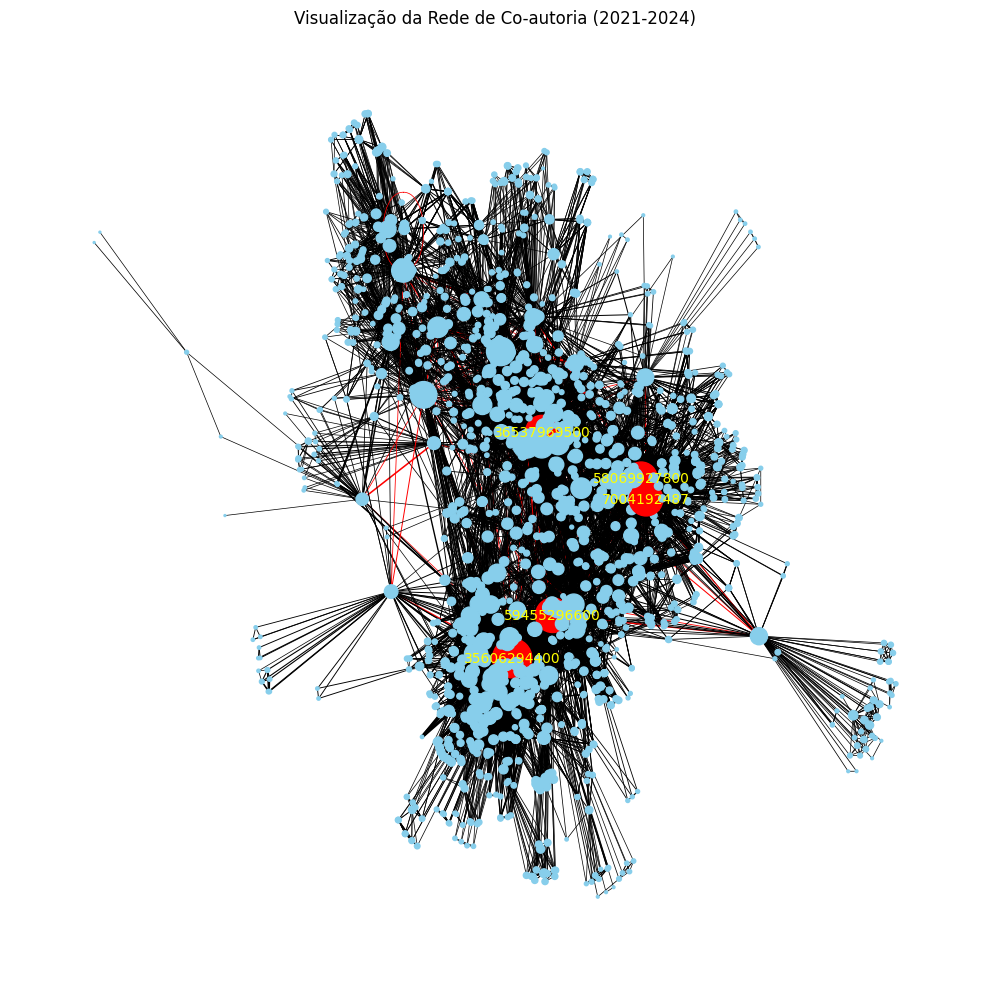

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Criada uma função para gerar implementar o grafo, evitando repetição de código
def visualizacao_grafo(ano1, ano2):
    arquivo = '/content/drive/MyDrive/2025.1/AED2/Archive/basedados/avaliacao_geral/'+str(ano1)+'-'+str(ano2)+'.gexf'

    # Criação de um grafo G não direcionado
    G = nx.read_gexf(arquivo)
    # Calcular layout
    pos = nx.spring_layout(G, seed=42)  # Configura o layout de distribuição dos nós e fixa a posição
    # Tamanho do grafo pode ser grande, então vamos usar tamanho pequeno de nós e arestas

    # Lista para setar o tamanho de cada nó para ser proporcional ao grau
    tam_no = []
    for node, degree in G.degree():
        tam_no.append(degree*2)

    # Lista que seta a cor de cada aresta
    edge_colors = []

    # Laço que verifica a propriedade 'is_permanent' e indica qual a cor da aresta
    for u, v in G.edges():
        if G.nodes[u].get('is_permanent') and G.nodes[v].get('is_permanent'):
            edge_colors.append('red') # Se os dois vértices forem True, a aresta será vermelha
        else:
            edge_colors.append('black') # Se pelo menos um for False, será preta

    # Lista que seta a largura de cada aresta
    edge_widths = []

    # Laço que verifica a propriedade 'citation_num' e proporciona a largura da aresta
    for u, v in G.edges():
        citation = G[u][v].get('citation_num')
        edge_widths.append(citation)
    # Cria uma figura
    plt.figure(figsize=(10, 10))

    # Normalizar os valores entre uma largura mínima e máxima
    largura_min, largura_max = 0.5, 8
    valores_np = np.array(edge_widths)
    valores_norm = (valores_np - valores_np.min()) / (valores_np.max() - valores_np.min())
    # Para evitar valores muito grandes ou nulos
    larguras = largura_min + valores_norm * (largura_max - largura_min)

    # Seta os 5 nós com maior grau
    top5_nos = [n for n, _ in sorted(G.degree(), key=lambda x: x[1], reverse=True)[:5]]

    # Para altear a cor dos nós Top5 para red, deixando skyblue se não for
    node_colors = ['red' if node in top5_nos else 'skyblue' for node in G.nodes()]

    # Adiciona um label nos nós Top5
    nx.draw_networkx_labels(G, pos, labels={n: n for n in top5_nos}, font_size=10, font_color='yellow')

    # Cria o desenho do grafo com as propriedades
    nx.draw(G, pos, node_size=tam_no, edge_color=edge_colors, node_color=node_colors, with_labels=False, width=larguras)

    # Título e legenda
    plt.title(f'Visualização da Rede de Co-autoria ({ano1}-{ano2})')
    plt.axis('off')
    plt.tight_layout()
    plt.show() # Para exibição

visualizacao_grafo(2010,2012)
visualizacao_grafo(2013,2016)
visualizacao_grafo(2017,2020)
visualizacao_grafo(2021,2024)


# Requisito 3
## Rede Geral
O código abaixo cria um grafo com os dados da rede geral (2010-2025) de co-autoria do PPgEEC, mantendo as mesmas características do requisito 2.
A fim de análise, são impressas as métricas da rede, mostrando a Densidade, nº de  nós, nº de arestas e média dos graus.


Rede de autores geral (2010-2025)
Densidade: 0.009, Nº de nós: 2454, Nº de arestas: 26113, Grau médio: 21.282


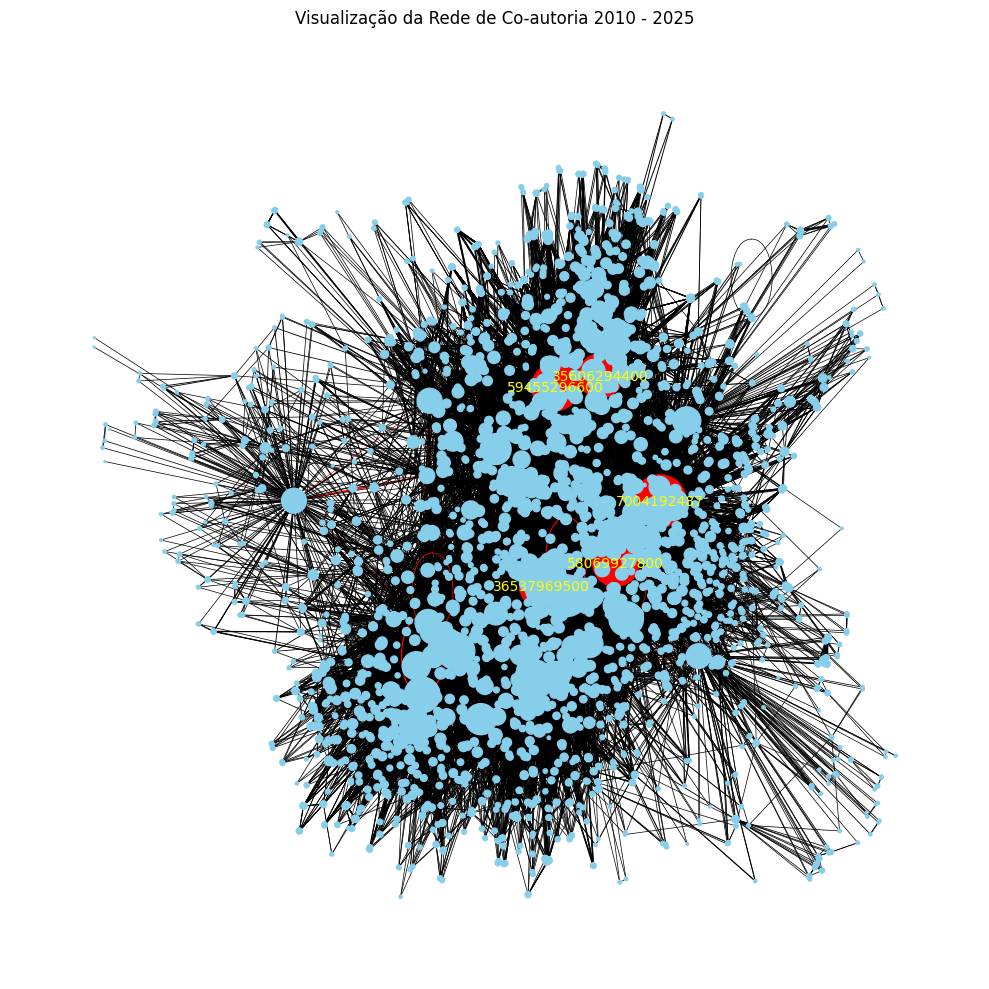

In [41]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Criada uma função para gerar implementar o grafo, evitando repetição de código
arquivo = '/content/drive/MyDrive/2025.1/AED2/Archive/basedados/avaliacao_geral/2010-2025.gexf'

# Criação de um grafo H não direcionado
H = nx.read_gexf(arquivo)
graus = [grau for _, grau in H.degree()] # Cria uma lista com o grau dos nós do grafo
media_graus = sum(graus) / len(graus) # Calcula o valor médio dos graus

# Imprime as métricas da rede
print('\nRede de autores geral (2010-2025)')
print(f'Densidade: {nx.density(H):.3f}, Nº de nós: {H.number_of_nodes()}, Nº de arestas: {H.number_of_edges()}, Grau médio: {media_graus:.3f}')
# Calcular layout
pos = nx.spring_layout(H, seed=42)  # Configura o layout de distribuição dos nós e fixa a posição
# Tamanho do grafo pode ser grande, então vamos usar tamanho pequeno de nós e arestas

# Lista para setar o tamanho de cada nó para ser proporcional ao grau
tam_no = []
for node, degree in H.degree():
    tam_no.append(degree*2)

# Lista que seta a cor de cada aresta
edge_colors = []

# Laço que verifica a propriedade 'is_permanent' e indica qual a cor da aresta
for u, v in H.edges():
    if H.nodes[u].get('is_permanent') and H.nodes[v].get('is_permanent'):
        edge_colors.append('red') # Se os dois vértices forem True, a aresta será vermelha
    else:
        edge_colors.append('black') # Se pelo menos um for False, será preta

# Lista que seta a largura de cada aresta
edge_widths = []

# Laço que verifica a propriedade 'citation_num' e proporciona a largura da aresta
for u, v in H.edges():
    citation = H[u][v].get('citation_num')
    edge_widths.append(citation)
# Cria uma figura
plt.figure(figsize=(10, 10))

# Normalizar os valores entre uma largura mínima e máxima
largura_min, largura_max = 0.5, 8
valores_np = np.array(edge_widths)
valores_norm = (valores_np - valores_np.min()) / (valores_np.max() - valores_np.min())
# Para evitar valores muito grandes ou nulos
larguras = largura_min + valores_norm * (largura_max - largura_min)

# Seta os 5 nós com maior grau
top5_nos = [n for n, _ in sorted(H.degree(), key=lambda x: x[1], reverse=True)[:5]]

# Para altear a cor dos nós Top5 para red, deixando skyblue se não for
node_colors = ['red' if node in top5_nos else 'skyblue' for node in H.nodes()]

# Adiciona um label nos nós Top5
nx.draw_networkx_labels(H, pos, labels={n: n for n in top5_nos}, font_size=10, font_color='yellow')

# Cria o desenho do grafo com as propriedades
nx.draw(H, pos, node_size=tam_no, edge_color=edge_colors, node_color=node_colors, with_labels=False, width=larguras)

# Título e legenda
plt.title(f'Visualização da Rede de Co-autoria 2010 - 2025')
plt.axis('off')
plt.tight_layout()
plt.show() # Para exibição


Nessa segunda parte do requisito 3, é criado um sub-grafo da rede geral apenas com os vértices que possuem pelo menos 200 vizinhos.
</br>A fim de análise, são impressas as métricas da rede, mostrando a Densidade, Nº de  nós, Nº de arestas e Média dos graus.


Sub-grafo da rede geral de autores
Densidade: 0.561, Nº de nós: 19, Nº de arestas: 96, Grau médio: 10.105


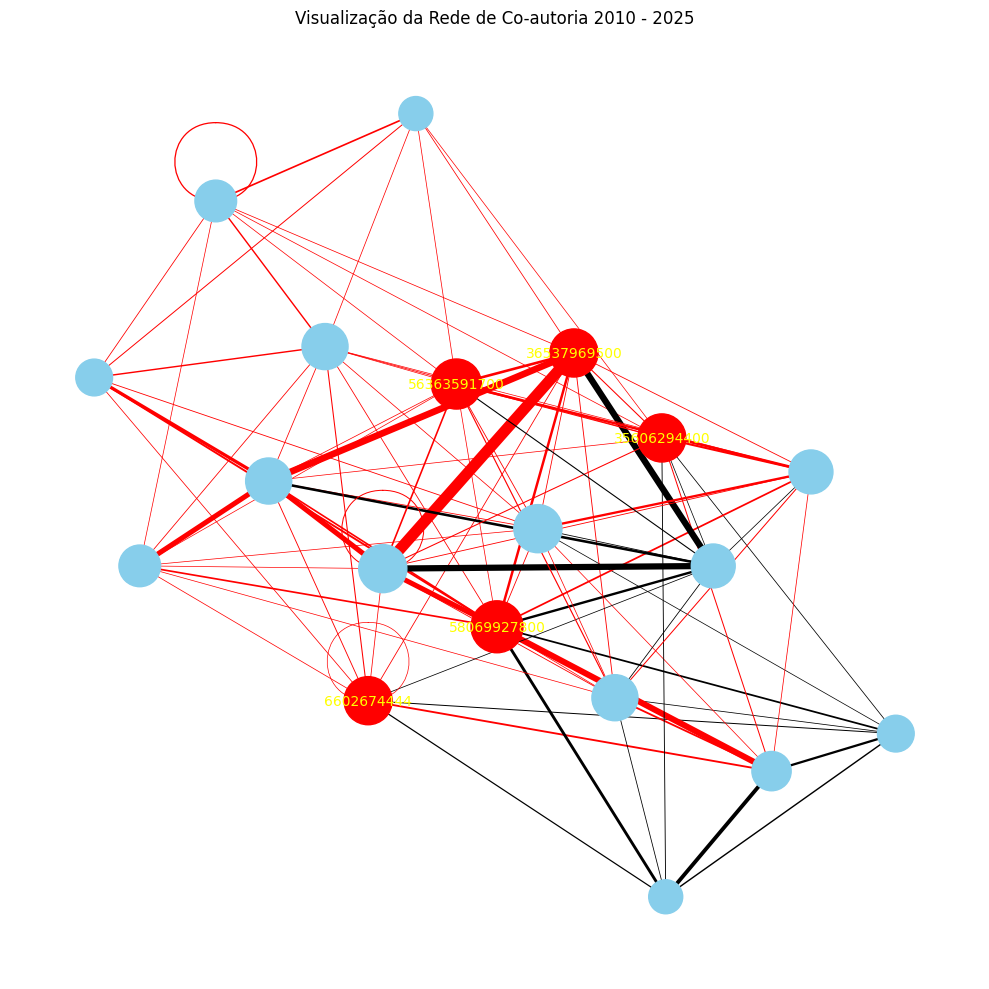

In [34]:
# Filtrar nós com grau maior ou igual a 200
nos_filtrados = [n for n, grau in H.degree() if grau >= 200]

# Criar o subgrafo
subG = H.subgraph(nos_filtrados).copy()
graus = [grau for _, grau in subG.degree()] # Cria uma lista com o grau dos nós do grafo
media_graus = sum(graus) / len(graus) # Calcula o valor médio dos graus

# Imprime as métricas da rede
print('\nSub-grafo da rede geral de autores')
print(f'Densidade: {nx.density(subG):.3f}, Nº de nós: {subG.number_of_nodes()}, Nº de arestas: {subG.number_of_edges()}, Grau médio: {media_graus:.3f}')
# Calcular layout
pos = nx.spring_layout(subG, seed=42)  # Configura o layout de distribuição dos nós e fixa a posição
# Tamanho do grafo pode ser grande, então vamos usar tamanho pequeno de nós e arestas

# Lista para setar o tamanho de cada nó para ser proporcional ao grau
tam_no = []
for node, degree in subG.degree():
    tam_no.append(degree*100)

# Lista que seta a cor de cada aresta
edge_colors = []

# Laço que verifica a propriedade 'is_permanent' e indica qual a cor da aresta
for u, v in subG.edges():
    if subG.nodes[u].get('is_permanent') and subG.nodes[v].get('is_permanent'):
        edge_colors.append('red') # Se os dois vértices forem True, a aresta será vermelha
    else:
        edge_colors.append('black') # Se pelo menos um for False, será preta

# Lista que seta a largura de cada aresta
edge_widths = []

# Laço que verifica a propriedade 'citation_num' e proporciona a largura da aresta
for u, v in subG.edges():
    citation = subG[u][v].get('citation_num')
    edge_widths.append(citation)
# Cria uma figura
plt.figure(figsize=(10, 10))

# Normalizar os valores entre uma largura mínima e máxima
largura_min, largura_max = 0.5, 8
valores_np = np.array(edge_widths)
valores_norm = (valores_np - valores_np.min()) / (valores_np.max() - valores_np.min())
# Para evitar valores muito grandes ou nulos
larguras = largura_min + valores_norm * (largura_max - largura_min)
# Normalizar os valores entre uma largura mínima e máxima

# Seta os 5 nós com maior grau
top5_nos = [n for n, _ in sorted(subG.degree(), key=lambda x: x[1], reverse=True)[:5]]

# Para altear a cor dos nós Top5 para red, deixando skyblue se não for
node_colors = ['red' if node in top5_nos else 'skyblue' for node in subG.nodes()]

# Adiciona um label nos nós Top5
nx.draw_networkx_labels(subG, pos, labels={n: n for n in top5_nos}, font_size=10, font_color='yellow')

# Cria o desenho do grafo com as propriedades
nx.draw(subG, pos, node_size=tam_no, edge_color=edge_colors, node_color=node_colors, with_labels=False, width=larguras)

# Título e legenda
plt.title(f'Visualização da Rede de Co-autoria 2010 - 2025')
plt.axis('off')
plt.tight_layout()
plt.show() # Para exibição


Analisando a rede ego do vértice de maior grau


Nó Ego de maior grau do sub-grafo
Densidade: 0.590, Nº de nós: 15, Nº de arestas: 62, Grau médio: 8.267


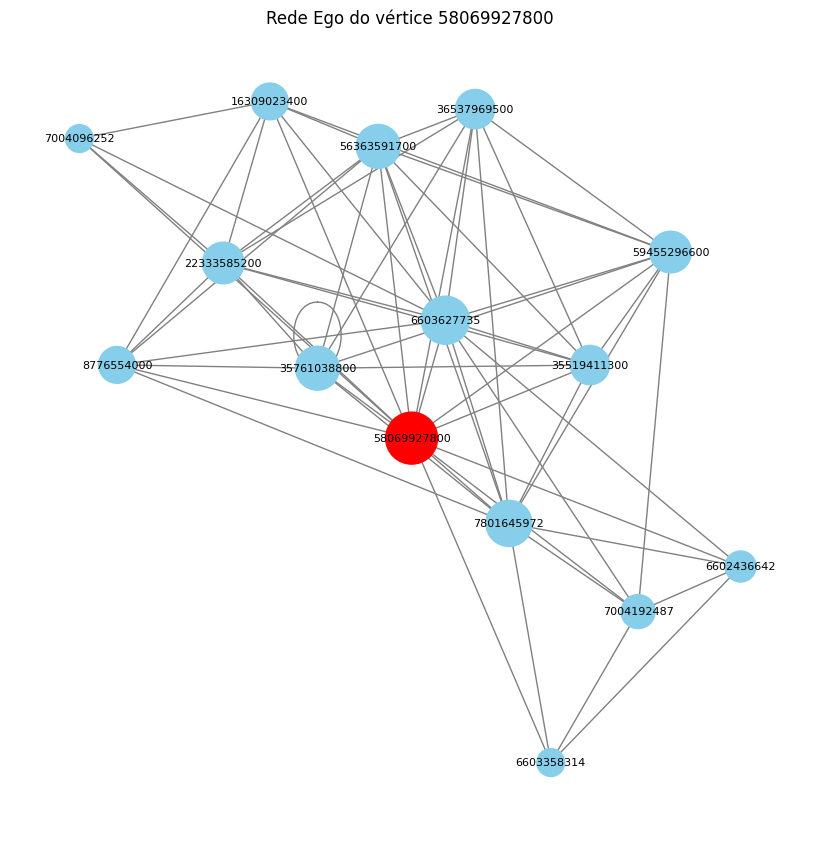

In [42]:
ego_no = max(subG.degree(), key=lambda x: x[1])[0] # Pega o 'id' do nó de maior grau do sub-grafo
ego_subG = nx.ego_graph(subG, ego_no, radius=1) # Cria um ego_graph a partir dos dados
pos = nx.spring_layout(subG, seed=42) # Calcula as novas posições

# Seta a cor vermelhah para o vértice ego
node_colors = ['red' if node == ego_no else 'skyblue' for node in ego_subG.nodes()]
tam_no = [ego_subG.degree(n) * 100 for n in ego_subG.nodes()]

graus = [grau for _, grau in ego_subG.degree()] # Cria uma lista com o grau dos nós do grafo
media_graus = sum(graus) / len(graus) # Calcula o valor médio dos graus

# Imprime as métricas da rede
print('\nNó Ego de maior grau do sub-grafo')
print(f'Densidade: {nx.density(ego_subG):.3f}, Nº de nós: {ego_subG.number_of_nodes()}, Nº de arestas: {ego_subG.number_of_edges()}, Grau médio: {media_graus:.3f}')

plt.figure(figsize=(8,8)) # Cria a figura
# Cria o grafo
nx.draw(
    ego_subG,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=tam_no,
    edge_color='gray',
    font_size=8
)
plt.title(f"Rede Ego do vértice {ego_no}")
plt.axis('off')
plt.show() # Função de exibição
